In [77]:
#! pip install pickle

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


In [79]:
heart_data = pd.read_csv('heart.csv')

In [80]:
# print first 10 rows of the dataset
heart_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [81]:
# print last 10 rows of the dataset
heart_data.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [82]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [83]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [84]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [85]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [86]:
X  = heart_data.drop(columns='fbs', axis=1)
Y = heart_data['fbs']

In [87]:
print(X)

     age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
0     63    1   3       145   233        0      150      0      2.3      0   
1     37    1   2       130   250        1      187      0      3.5      0   
2     41    0   1       130   204        0      172      0      1.4      2   
3     56    1   1       120   236        1      178      0      0.8      2   
4     57    0   0       120   354        1      163      1      0.6      2   
..   ...  ...  ..       ...   ...      ...      ...    ...      ...    ...   
298   57    0   0       140   241        1      123      1      0.2      1   
299   45    1   3       110   264        1      132      0      1.2      1   
300   68    1   0       144   193        1      141      0      3.4      1   
301   57    1   0       130   131        1      115      1      1.2      1   
302   57    0   1       130   236        0      174      0      0.0      1   

     ca  thal  target  
0     0     1       1  
1     0     2  

In [88]:
print(Y)

0      1
1      0
2      0
3      0
4      0
      ..
298    0
299    0
300    1
301    0
302    0
Name: fbs, Length: 303, dtype: int64


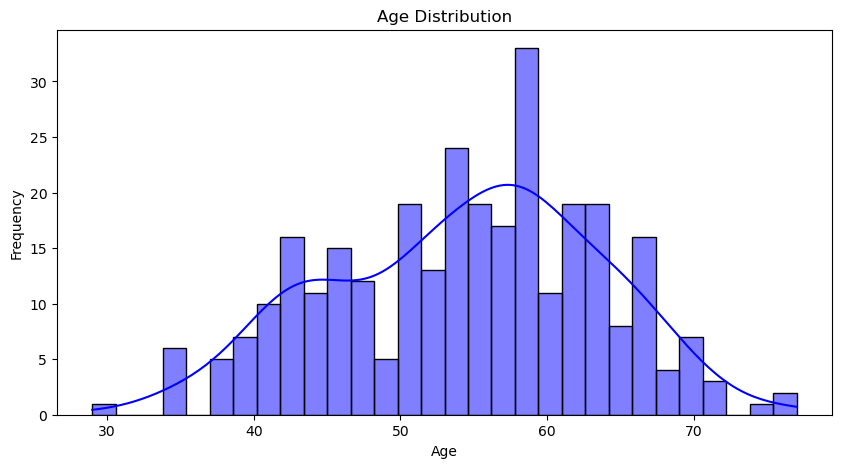

In [89]:
# Age distribution
plt.figure(figsize=(10, 5))
sns.histplot(heart_data['age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

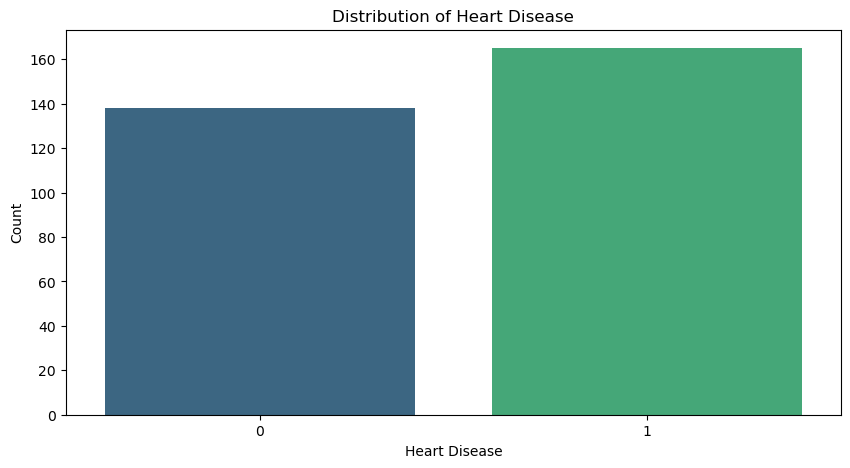

In [90]:
# Distribution of target variable (heart disease presence)
plt.figure(figsize=(10, 5))
sns.countplot(x='target', data=heart_data, palette='viridis')
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

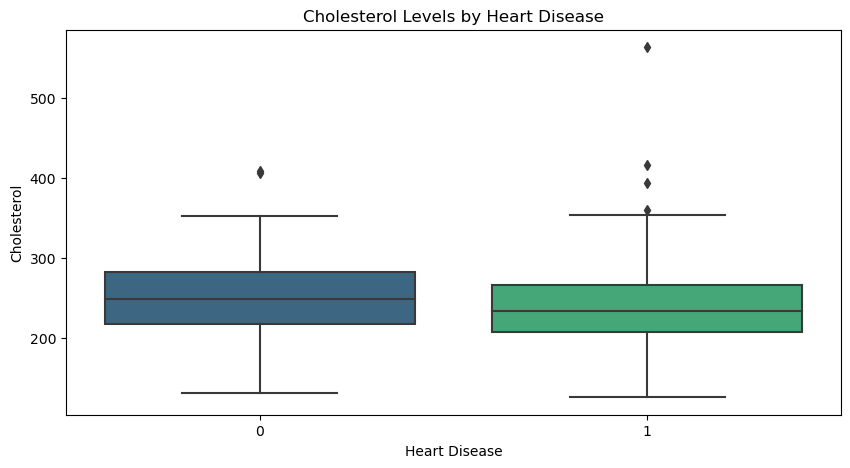

In [91]:
# Cholesterol levels by target
plt.figure(figsize=(10, 5))
sns.boxplot(x='target', y='chol', data=heart_data, palette='viridis')
plt.title('Cholesterol Levels by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol')
plt.show()

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [93]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


In [94]:
def RunLogisticRegression(X_train, X_test, Y_train, Y_test):
    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model_log = LogisticRegression(max_iter=500)  # Increase the number of iterations

    # Training the LogisticRegression model with Training data
    model_log.fit(X_train_scaled, Y_train)

    # Accuracy on training data
    X_train_prediction = model_log.predict(X_train_scaled)
    training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

    # Accuracy on test data
    X_test_prediction = model_log.predict(X_test_scaled)
    test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

    accuracy = [training_data_accuracy, test_data_accuracy]
    return accuracy 

    

In [95]:
def RunkNeighbourClassifier(X_train, X_test, Y_train, Y_test, n_neighbour):
    KNN_Classifier = KNeighborsClassifier( p =n_neighbour , metric='minkowski')
    KNN_Classifier.fit(X_train, Y_train)
    
    #Let's predict the classes for test data
    pred_test = KNN_Classifier.predict(X_test)
    test_data_accuracy = accuracy_score(pred_test, Y_test)            
    return test_data_accuracy

In [96]:
accuracy_logistic=RunLogisticRegression(X_train, X_test, Y_train, Y_test)

In [97]:
print('Accuracy of Logistic Training data : ', accuracy_logistic[0])

Accuracy of Logistic Training data :  0.8429752066115702


In [98]:
print('Accuracy on Test data : ', accuracy_logistic[1])

Accuracy on Test data :  0.8360655737704918


In [99]:
accuracy_kNeighbour =RunkNeighbourClassifier(X_train, X_test, Y_train, Y_test,100)

In [100]:
print(accuracy_kNeighbour)

0.819672131147541


In [101]:
def RunSVM(X_train, X_test, Y_train, Y_test):
    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize the SVM model
    model_svm = SVC(kernel='linear', max_iter=10000)

    # Train the SVM model
    model_svm.fit(X_train_scaled, Y_train)

    # Accuracy on training data
    X_train_prediction = model_svm.predict(X_train_scaled)
    training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

    # Accuracy on test data
    X_test_prediction = model_svm.predict(X_test_scaled)
    test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

    accuracy = [training_data_accuracy, test_data_accuracy]
    return accuracy

In [102]:
# Run the SVM model and print accuracies
accuracies_svm = RunSVM(X_train, X_test, Y_train, Y_test)
print("Training Data Accuracy:", accuracies[0])
print("Test Data Accuracy:", accuracies[1])

Training Data Accuracy: 0.8512396694214877
Test Data Accuracy: 0.8524590163934426
